In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Define the linear regression model
def linear_regression(X, w, b):
    return np.dot(X, w) + b

# Define the loss function (Mean Squared Error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Define the gradient of the loss function with respect to w and b
def compute_gradients(X, y, y_pred):
    m = len(y)
    dw = -2/m * np.dot(X.T, (y - y_pred))
    db = -2/m * np.sum(y - y_pred)
    return dw, db

# Define the SGD function with additional gradient norm tracking
def sgd(X, y, learning_rate=0.01, epochs=100, method='standard', clip_value=5, decay_rate=0.99):
    m, n = X.shape
    mse_list = []
    grad_norm_list = []
    w = np.zeros(n)
    b = 0

    # Normalize the data
    X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # Single shuffle before training
    if method == 'single_shuffle':
        permutation = np.random.permutation(m)
        X = X[permutation]
        y = y[permutation]

    for epoch in range(epochs):
        if method == 'random_reshuffle':
            # Shuffle the data at the beginning of each epoch
            permutation = np.random.permutation(m)
            X = X[permutation]
            y = y[permutation]

        for i in range(m):
            Xi = X[i:i+1]
            yi = y[i:i+1]
            y_pred = linear_regression(Xi, w, b)

            # Compute gradients
            dw, db = compute_gradients(Xi, yi, y_pred)
            dw = dw.ravel()  # Flatten dw to match the shape of w

            # Gradient clipping
            dw = np.clip(dw, -clip_value, clip_value)
            db = np.clip(db, -clip_value, clip_value)

            # Update parameters
            w -= learning_rate * dw
            b -= learning_rate * db

        # Calculate predictions for the entire dataset
        y_pred = linear_regression(X, w, b)
        mse_list.append(mean_squared_error(y, y_pred))

        # Compute the gradient norm
        dw, db = compute_gradients(X, y, y_pred)
        grad_norm = np.linalg.norm(np.append(dw, db))
        grad_norm_list.append(grad_norm)

        # Apply learning rate decay
        learning_rate *= decay_rate

#         # Optionally print progress
#         if epoch % 100 == 0:
#             print(f"Epoch {epoch}, MSE: {mse_list[-1]}, Gradient Norm: {grad_norm}")

    return w, b, mse_list, grad_norm_list


Method: standard, Learning Rate: 0.2
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674

Method: single_shuffle, Learning Rate: 0.2
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674

Method: random_reshuffle, Learning Rate: 0.2
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674


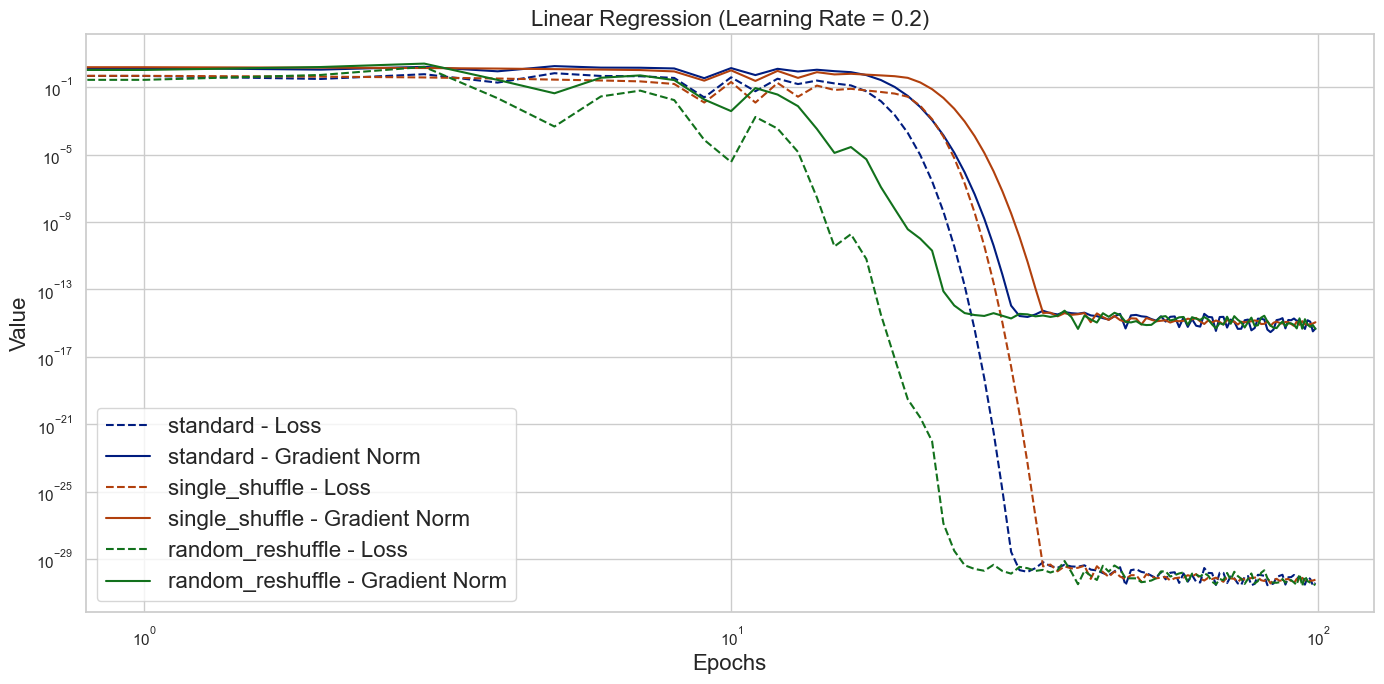


Method: standard, Learning Rate: 0.1
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674

Method: single_shuffle, Learning Rate: 0.1
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674

Method: random_reshuffle, Learning Rate: 0.1
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674


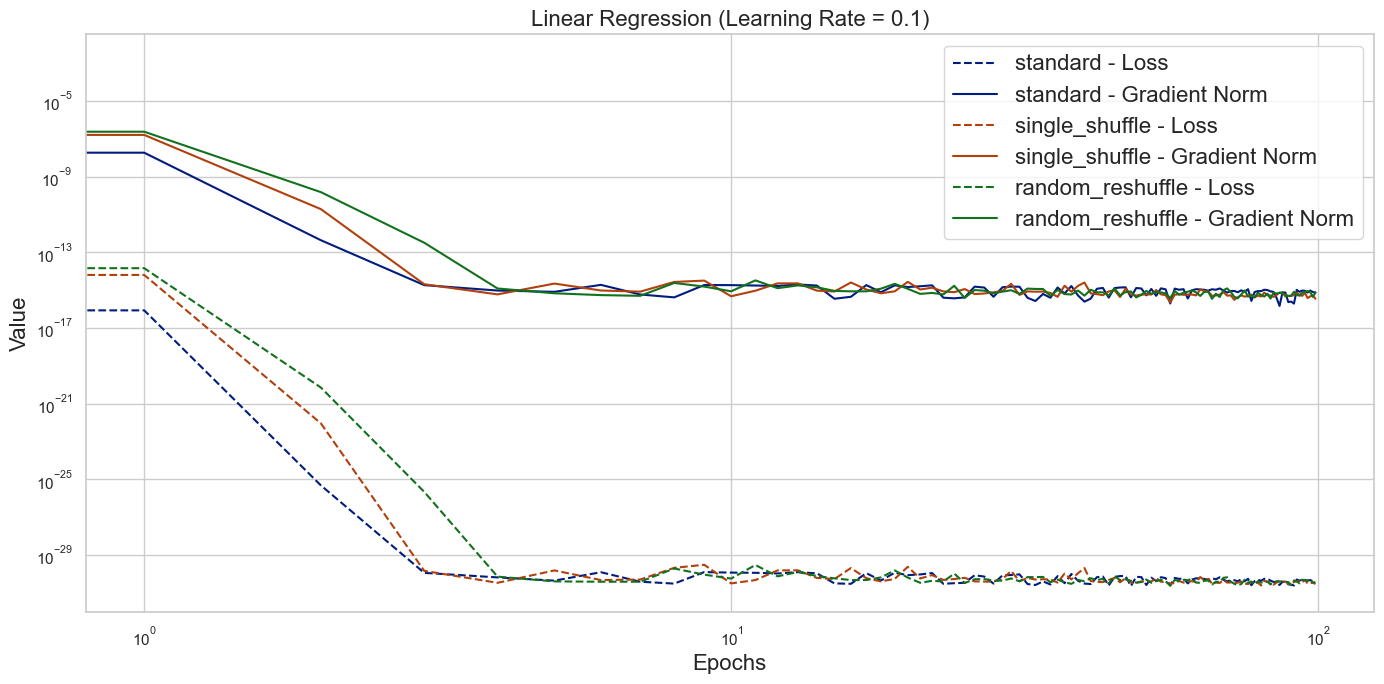


Method: standard, Learning Rate: 0.01
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917674

Method: single_shuffle, Learning Rate: 0.01
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917675

Method: random_reshuffle, Learning Rate: 0.01
Weights: [0.10824921 0.09724232 0.08905251 0.09681111]
Bias: 7.988579201917676


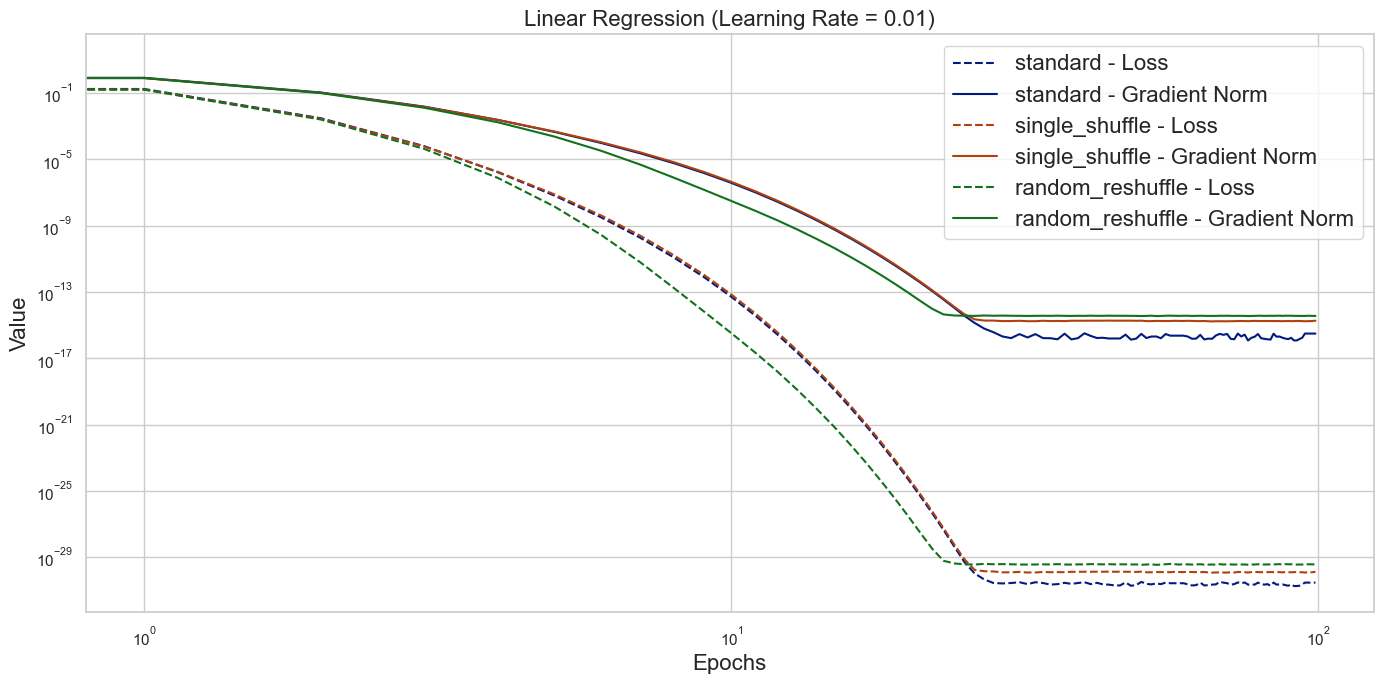

In [4]:
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(0)
    n = 100  # number of samples
    m = 4    # number of features
    X = 1 + np.random.normal(0, 1/10, (n, m))
#     true_weights = np.array([1.5, -2.0, 0.5, 3.0])
#     y = 4 + np.dot(X, true_weights) + np.random.randn(n) * 0.1  # adding noise
    y = 4 + np.inner(np.ones(m),  X)

    # Fit the model using different SGD methods
    methods = ['standard', 'single_shuffle', 'random_reshuffle']
    learning_rates = [0.2, 0.1, 0.01]
    
    
    sns.set(style='whitegrid')
    palette = sns.color_palette("dark",len(methods), as_cmap='True')

    for lr in learning_rates:
        plt.figure(figsize=(14, 7))
        for method, color in zip(methods, palette):
            print(f"\nMethod: {method}, Learning Rate: {lr}")
            w, b, mse, grad_norm = sgd(X, y, learning_rate=lr, epochs=100, method=method)
            print("Weights:", w)
            print("Bias:", b)
            
            epochs = range(len(mse))
            plt.plot(epochs, mse, label=f'{method} - Loss', color=color, linestyle='--')
            plt.plot(epochs, grad_norm, label=f'{method} - Gradient Norm', color=color)

        plt.title(f'Linear Regression (Learning Rate = {lr})', fontsize=16)
        plt.legend(fontsize=16)
        plt.yscale('log')
        plt.xlabel('Epochs', fontsize=16)
        plt.ylabel('Value', fontsize=16)
        plt.xscale('log')
        plt.grid(True)
        plt.tight_layout()
        plt.show()